In [11]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import linregress
import requests
from datetime import datetime


In [12]:
card_fraud_path_load = Path("resource/credit_card_fraud.csv")
transaction_data = pd.read_csv(card_fraud_path_load)
transaction_data.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [13]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [14]:
#creating a copy of data 
transaction_df=transaction_data.copy()

In [15]:
# assigning  datetime column to date time object
transaction_df["Card Expiration Date"] = pd.to_datetime(transaction_df["Card Expiration Date"],format="%m/%d",errors="coerce")

In [16]:
#Convert the 'date' column to datetime
transaction_df['Transaction Date and Time'] = pd.to_datetime(transaction_df['Transaction Date and Time'])               # Create separate columns for date and time
transaction_df['Date'] = transaction_df['Transaction Date and Time'].dt.date
transaction_df['Time'] = transaction_df['Transaction Date and Time'].dt.time
# Remove the new columns from their current positions
Date = transaction_df.pop('Date')
Time = transaction_df.pop('Time')
# Insert the new columns at the desired positions
transaction_df.insert(1, 'Date', Date)
transaction_df.insert(2,'Time', Time)
transaction_df.head()


,Transaction Date and Time,Date,Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,...,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,2022-09-24,13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,...,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,2020-07-24,11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,...,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,2023-03-18,01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,...,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,2021-01-07,21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,...,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,2021-12-16,06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,...,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [17]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Transaction Date and Time                8000 non-null   datetime64[ns]
 1   Date                                     8000 non-null   object        
 2   Time                                     8000 non-null   object        
 3   Transaction Amount                       8000 non-null   float64       
 4   Cardholder Name                          8000 non-null   object        
 5   Card Number (Hashed or Encrypted)        8000 non-null   object        
 6   Merchant Name                            8000 non-null   object        
 7   Merchant Category Code (MCC)             8000 non-null   int64         
 8   Transaction Location (City or ZIP Code)  8000 non-null   object        
 9   Transaction Currency                     

In [18]:
flagged_df= transaction_df.loc[transaction_df["Fraud Flag or Label"]>=1]
flagged_df

,Transaction Date and Time,Date,Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,...,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,2022-09-24,13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,...,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,2020-07-24,11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,...,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,2023-03-18,01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,...,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
4,2021-12-16 06:22:24,2021-12-16,06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,...,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...
5,2020-01-14 21:03:12,2020-01-14,21:03:12,3341.97,Lagan Dutt,15bbdcdc198266c9c17633ffb7bf59ef1d48ad76db2267...,Ramesh Inc,9661,Farrukhabad,USD,...,33512007840ced1bb0aab68f47cb5f702abd494a15f26b...,5,92a7490d-89cc-43db-81a9-d152895813aa,1,2,In-Person,112.90.206.208,Mobile,hrishita37,Voluptatem voluptatem officiis alias eius beat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,2021-09-29 03:44:59,2021-09-29,03:44:59,725.97,Mishti Ganesan,1df5d22aeb2feac5027e08803c6308371d25a4b92a2f1a...,"Karan, Acharya and Chadha",2600,Vadodara,USD,...,c62510afc57db491f9f993387b76dd9a7d08f09c013269...,12,322dec40-440c-48f3-8547-25e467aa0250,1,NaN,In-Person,173.92.177.143,Desktop,samarth83,Quod illum sint voluptatum a. Numquam maxime l...
7993,2022-04-13 14:09:15,2022-04-13,14:09:15,3999.86,Bhamini Kala,ce7b7e9ada95884793167a46cbfa906f7349e433c5c2bd...,"Halder, Saha and Lad",3984,Eluru,EUR,...,76a00ed73f38046ec631b719ec46144b6c13f558c884eb...,0,1d14fef4-3c8c-4d7f-afc0-efe8b70b95ca,1,NaN,In-Person,123.248.72.142,Tablet,NaN,Perferendis porro quam in neque dolores sapien...
7996,2022-07-04 05:19:11,2022-07-04,05:19:11,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,...,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,NaN,Assumenda maxime provident rem quis consequunt...
7997,2022-08-14 19:14:45,2022-08-14,19:14:45,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,...,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,suhanavala,Voluptatibus odit praesentium iste libero ipsa...


In [19]:
#Analysis on Mn occation
flagged_df.groupby(["Transaction Location (City or ZIP Code)"])["Transaction ID"].count()

Transaction Location (City or ZIP Code)
Adoni            15
Agartala          7
Agra              9
Ahmedabad        17
Ahmednagar       13
                 ..
Vijayanagaram    17
Vijayawada       19
Visakhapatnam    10
Warangal         22
Yamunanagar      13
Name: Transaction ID, Length: 316, dtype: int64

In [20]:
#Analysis on Mn occation
transxns_per_location_df=flagged_df.groupby(["Transaction Location (City or ZIP Code)"])["Transaction ID"].count()


transxns_per_location_df = transxns_per_location_df.reset_index()

# Filter locations with more than 15 transactions
filtered_locations = transxns_per_location_df[transxns_per_location_df["Transaction ID"] > 15]

# Now you can use this filtered DataFrame to filter the original DataFrame
filtered_df = flagged_df[flagged_df["Transaction Location (City or ZIP Code)"].isin(filtered_locations["Transaction Location (City or ZIP Code)"])]
filtered_df

,Transaction Date and Time,Date,Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,...,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
2,2023-03-18 01:05:36,2023-03-18,01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,...,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
15,2022-05-03 17:20:53,2022-05-03,17:20:53,4172.21,Tanya Khalsa,3fe204cb8cf91a36f31cb8009e3ec5749d147007babf9a...,"Randhawa, Khanna and Kamdar",2162,Bhagalpur,USD,...,d86580a57f7bf542e85202283cb845953c9d28f80a8e65...,5,a836d1e0-9e0f-490a-b8aa-f8c67da63b02,1,1,In-Person,151.74.51.49,Mobile,NaN,Ducimus optio nulla ad cum deserunt eum. Aliqu...
16,2023-03-21 18:41:07,2023-03-21,18:41:07,1042.79,Samiha Chauhan,757b72ce3f0df46f81ccbe0057d1e19bd836a877bee354...,Warrior Ltd,1654,Bokaro,INR,...,1c63ed9164d61acfd1f4f3a7b6dfacbd98d1dc01e755b7...,0,37c09112-7c2a-41da-98ef-64304dde7ffe,1,NaN,In-Person,209.245.72.246,Mobile,NaN,Repellat at itaque nulla quis illum. Ipsum qui...
18,2023-04-02 10:46:13,2023-04-02,10:46:13,3347.31,Vihaan Lad,e5b77dfcb86216302e19d2a982ffa0ed7c51da4370de4e...,Bhatnagar-Sodhi,9263,Vijayawada,INR,...,1bee34b6262a7777362f96e3dd5635764e820f97bab977...,12,7843dba2-4cff-4902-bcff-4aef5fa26d11,1,2,In-Person,125.60.213.254,Desktop,NaN,Sed labore quisquam quasi. Doloremque dolorum ...
28,2023-05-02 00:09:44,2023-05-02,00:09:44,1448.31,Vihaan Dhingra,d3c75daead181dcb4e16519c16f7c05acfb181fba7c8b3...,"Swamy, Chawla and Boase",6818,Bareilly,USD,...,72805ff7c0f210f3aa6e66f3f208974437611c64a2393f...,12,504e5352-360c-4882-8eb3-994c7b86f50b,1,3 or more,In-Person,48.39.251.114,Mobile,bosesaksham,Aut minima similique eveniet necessitatibus. S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,2022-10-14 14:49:13,2022-10-14,14:49:13,4756.74,Badal Loke,2d296345f001fcd50ad9055da3535115c7c58cc7bd43e0...,"Ghose, Babu and Gola",3033,Rohtak,USD,...,2ac9a6746aca543af8dff39894cfe8173afba21eb01c6f...,0,de05de03-a108-4c7a-bd81-d60e0882592e,1,3 or more,In-Person,163.228.123.28,Desktop,NaN,Perferendis est incidunt perspiciatis dolorum ...
7974,2023-01-19 15:57:11,2023-01-19,15:57:11,3023.18,Indranil Singhal,2fc4ea1a32c67ea0c0b500f301c6dd0a0ea2876927a5fa...,Raj Inc,7777,Rajpur Sonarpur,INR,...,1e5ee5e58c8f490ae68e7e91b1575ebefc2bf6c211f302...,5,5804080a-5683-48bc-9164-e2d53b7a1d47,1,2,In-Person,190.77.52.2,Desktop,shayre,Nisi fugiat perspiciatis dolores.\nMolestias v...
7976,2021-12-29 04:58:43,2021-12-29,04:58:43,3868.89,Tarini Bali,615a05ce574b71b43e676f723911bb1c0ad12615b59707...,Talwar-Vala,4149,Jalgaon,EUR,...,91d95f436356bc3df44d44406a139351debd062823258c...,12,62b1f54d-48e3-4563-a63c-e9143ec5ac4f,1,NaN,Online,66.66.177.95,Tablet,saanvi97,Sequi nisi laborum unde a quasi. Corrupti dolo...
7982,2023-09-05 04:18:54,2023-09-05,04:18:54,1080.67,Mannat Tata,1f4e6b71a75b664dac3b236956537d6c274d6d8fd73e50...,Bala-Keer,1726,Dehradun,INR,...,462c39f8e9bbf461369150222f7493055e67079106a1a7...,12,9993921d-24f9-4ccb-a446-61611d66cdd9,1,1,Online,17.24.139.136,Tablet,evaraj,Qui dolorem eius adipisci dolor consequuntur p...


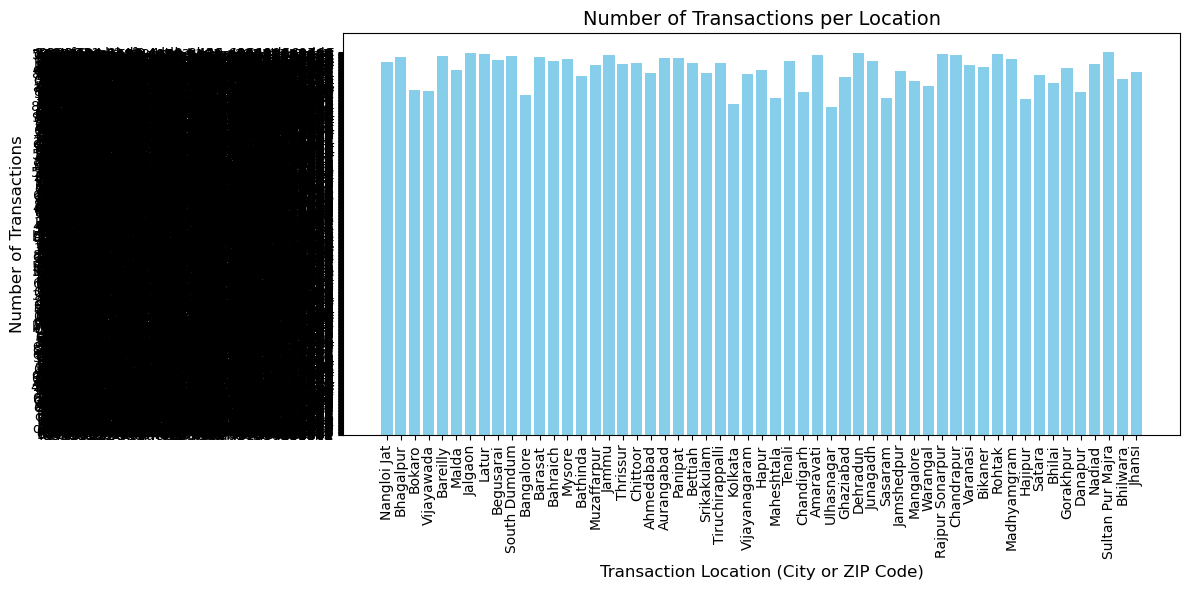

In [21]:
y_axis=filtered_df["Transaction ID"]
x_axis=filtered_df["Transaction Location (City or ZIP Code)"]
plt.figure(figsize=(12, 6))

# Plot the bar chart
plt.bar(x_axis, y_axis, color='skyblue')

# Add labels and title
plt.xlabel('Transaction Location (City or ZIP Code)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions per Location', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show gridlines
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [22]:
max_transxns=flagged_df["Transaction Location (City or ZIP Code)"].value_counts()
max_transxns.max()

34

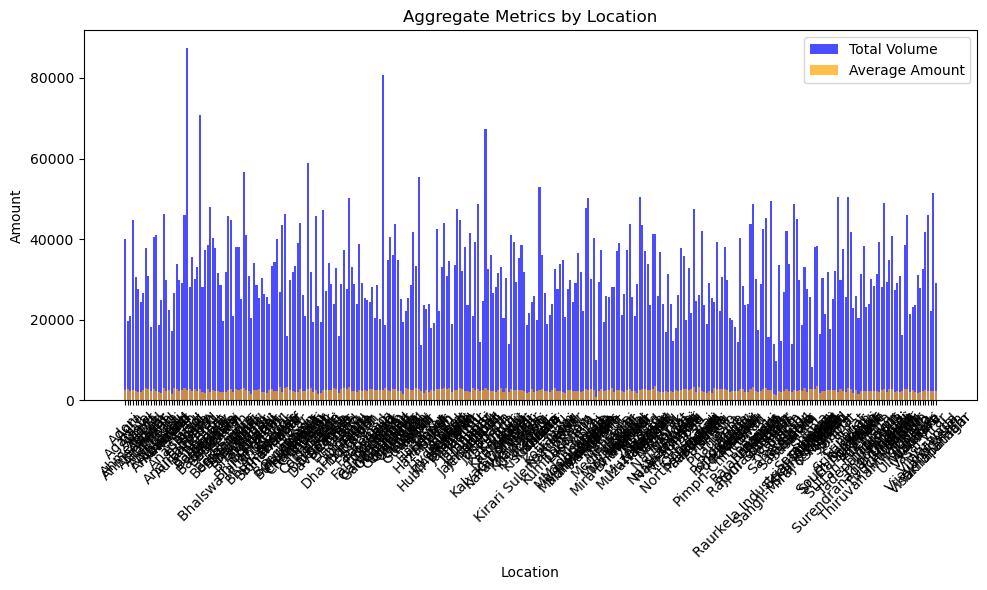

In [23]:
aggregate_metrics = flagged_df.groupby("Transaction Location (City or ZIP Code)")["Transaction Amount"].agg(["sum", "mean"]).reset_index()
aggregate_metrics.columns = ["Location", "Total Transaction Volume", "Average Transaction Amount"]

# Visualize aggregate metrics on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(aggregate_metrics["Location"], aggregate_metrics["Total Transaction Volume"], color='blue', alpha=0.7, label='Total Volume')
plt.bar(aggregate_metrics["Location"], aggregate_metrics["Average Transaction Amount"], color='orange', alpha=0.7, label='Average Amount')
plt.xlabel('Location')
plt.ylabel('Amount')
plt.title('Aggregate Metrics by Location')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#Comparing currency type vs number of transxns
currency=flagged_df.groupby(["Transaction Currency"])
currency_vs_trnsxn=currency["Transaction ID"].count()
currency_vs_trnsxn

Transaction Currency
EUR    1328
INR    1343
USD    1318
Name: Transaction ID, dtype: int64

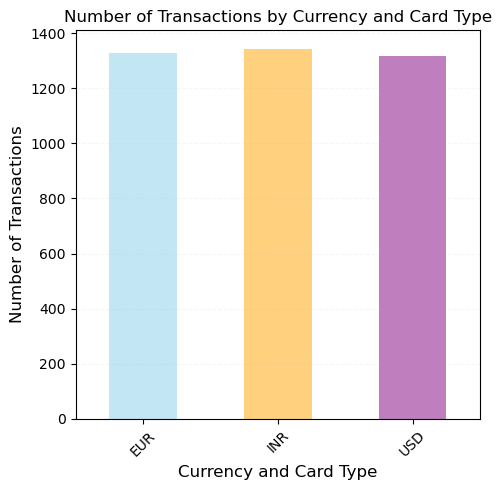

In [25]:
plt.figure(figsize=(5, 5))

# Plot the bar chart
currency_vs_trnsxn.plot(kind="bar",color=['skyblue', 'orange', 'purple'],alpha=0.5)

# Add labels and title
plt.xlabel('Currency and Card Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions by Currency and Card Type', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Show plot
plt.tight_layout()
plt.show()

In [26]:
# Exchange rates to USD (example rates, replace with actual rates)
exchange_rates = {
    "USD": 1.0,    # USD to USD
    "EUR": 1.2,    # 1 EUR = 1.2 USD
    "INR": 0.013   # 1 INR = 0.013 USD
}

# Function to convert amounts to USD
def convert_to_usd(amount, currency):
    return amount * exchange_rates[currency]

# Apply conversion to the dataframe
transaction_df["Amount in USD"] = transaction_df.apply(lambda row: convert_to_usd(row["Transaction Amount"], row["Transaction Currency"]), axis=1)

transaction_df.head()


,Transaction Date and Time,Date,Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,...,Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes,Amount in USD
0,2022-09-24 13:54:27,2022-09-24,13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...,3.71644
1,2020-07-24 11:20:13,2020-07-24,11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...,2132.78400
2,2023-03-18 01:05:36,2023-03-18,01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...,3939.01000
3,2021-01-07 21:53:04,2021-01-07,21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...,376.44000
4,2021-12-16 06:22:24,2021-12-16,06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...,21.93529


In [27]:
# Aggregate metrics (total transaction volume and average transaction amount) for each location
# Assuming you have a 'Transaction Location (City or ZIP Code)' column in your actual dataframe
currency_grouped = transaction_df.groupby("Transaction Currency").agg(
    Total_Transaction_Volume=pd.NamedAgg(column="Amount in USD", aggfunc="sum"),
    Average_Transaction_Amount=pd.NamedAgg(column="Amount in USD", aggfunc="mean")
).reset_index()

currency_grouped

,Transaction Currency,Total_Transaction_Volume,Average_Transaction_Amount
0,EUR,7.921882e+06,2998.441240
1,INR,8.731490e+04,32.183893
2,USD,6.652749e+06,2515.217093


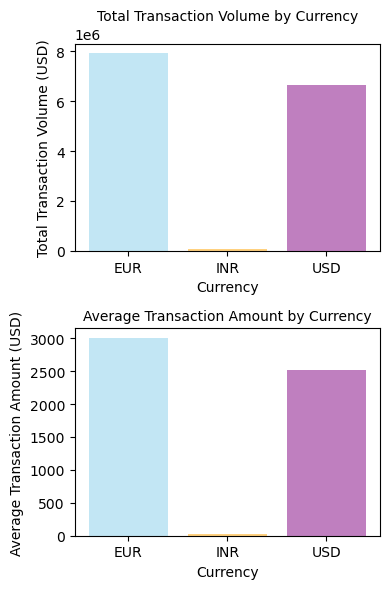

In [28]:
# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(4, 6))

# Bar chart for total transaction volume
ax[0].bar(currency_grouped["Transaction Currency"], currency_grouped["Total_Transaction_Volume"],color=['skyblue', 'orange', 'purple'],alpha=0.5)
ax[0].set_title("Total Transaction Volume by Currency",fontsize=10)
ax[0].set_xlabel("Currency",fontsize=10)
ax[0].set_ylabel("Total Transaction Volume (USD)",fontsize=10)

# Bar chart for average transaction amount
ax[1].bar(currency_grouped["Transaction Currency"], currency_grouped["Average_Transaction_Amount"],color=['skyblue', 'orange', 'purple'],alpha=0.5)
ax[1].set_title("Average Transaction Amount by Currency",fontsize=10)
ax[1].set_xlabel("Currency",fontsize=10)
ax[1].set_ylabel("Average Transaction Amount (USD)",fontsize=10)

plt.tight_layout()
plt.show()